In [11]:
# Libraries
from bs4 import BeautifulSoup, Comment
import numpy as np
import pandas as pd
import itertools as it
import matplotlib
import matplotlib.pyplot as plt
import random
import urllib
import urllib2
import os
import re
import scipy.stats as stats
import unicodedata
import datetime
import requests
import requests_cache
requests_cache.install_cache('demo_cache')
%matplotlib inline

In [41]:
def get_playoffs(df, yr):
    return df[(df['datetime'] > datetime.date(yr,4,1)) & (df['g_num'] <= 7)]

In [42]:
def get_reg_season(df, yr):
    return df[(df['datetime'] < datetime.date(yr,4,1)) | (df['g_num'] > 7)]

In [46]:
def timestamp_to_datetime(timestamp):
    return datetime.date(timestamp.year, timestamp.month, timestamp.day)

In [47]:
def fix_dates(df):
    df = df.reset_index()
    datetimes = []
    for timestamp in df['date']:
        datetimes.append(timestamp_to_datetime(timestamp))
    df['datetime'] = datetimes
    return df

In [4]:
df = pd.read_excel('data/box_scores/box_score_2017.xlsx')

In [7]:
print df.shape
df.head()

(27874, 42)


,ast,blk,drb,fg,fg3,fg3_pct,fg3a,fg_pct,fga,ft,...,stl_pct,tov_pct,trb_pct,ts_pct,usg_pct,g_num,g_id,team,date,season
0,0,2,3,5,3,0.60,5,0.385,13,3,...,1.5,11.3,11.0,0.512,22.7,1,201610250CLE,NYK,2016-10-25,2017
1,3,0,4,8,1,0.25,4,0.444,18,2,...,1.6,17.5,8.6,0.503,32.1,1,201610250CLE,NYK,2016-10-25,2017
2,1,1,1,7,1,0.50,2,0.412,17,2,...,0.0,18.3,5.2,0.475,31.2,1,201610250CLE,NYK,2016-10-25,2017
3,0,1,2,0,0,0.00,2,0.000,5,0,...,0.0,28.6,7.9,0.000,15.1,1,201610250CLE,NYK,2016-10-25,2017
4,3,0,5,0,0,NaN,0,0.000,1,0,...,2.5,50.0,15.9,0.000,4.3,1,201610250CLE,NYK,2016-10-25,2017


In [15]:
len(np.unique(df['g_id']))

1309

In [16]:
mytable = df.groupby(['g_id','team']).size()

In [17]:
mytable

g_id          team
201610250CLE  CLE     13
              NYK     13
201610250GSW  GSW     13
              SAS     13
201610250POR  POR     10
              UTA     10
201610260BOS  BOS     10
              BRK     12
201610260IND  DAL     12
              IND     11
201610260LAL  HOU     10
              LAL     12
201610260MEM  MEM      9
              MIN     10
201610260MIL  CHH     10
              MIL     11
201610260NOP  DEN     10
              NOP     11
201610260ORL  MIA      9
              ORL      8
201610260PHI  OKC     10
              PHI     11
201610260PHO  PHO     12
              SAC     12
201610260TOR  DET     12
              TOR     10
201610270ATL  ATL     12
              WAS     13
201610270CHI  BOS     10
              CHI     10
                      ..
201705140GSW  GSW     11
              SAS     11
201705150BOS  BOS     10
              WAS     12
201705160GSW  GSW     13
              SAS     13
201705170BOS  BOS     12
              CLE     12
201705

In [48]:
df = fix_dates(df)

df_reg = get_reg_season(df, 2017)
df_playoff = get_playoffs(df, 2017)

In [60]:
counts_reg = df_reg.groupby(['g_id','team']).size().reset_index().rename(columns={0:'count'})

In [62]:
counts_reg.head()

,g_id,team,count
0,201610250CLE,CLE,13
1,201610250CLE,NYK,13
2,201610250GSW,GSW,13
3,201610250GSW,SAS,13
4,201610250POR,POR,10


In [63]:
np.mean(counts_reg['count'])

10.62479674796748

In [64]:
float(sum(counts_reg['count'] < 9))/len(counts_reg['count'])

0.01869918699186992

In [65]:
sum(counts_reg['count'] < 9)

46

In [70]:
len(counts_reg)

2460

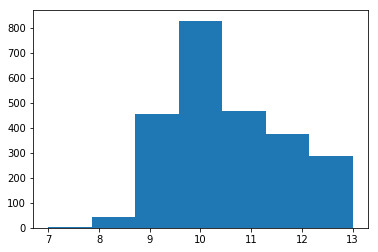

In [69]:
plt.hist(counts_reg['count'], bins=7)
plt.show()

In [55]:
counts_playoff = df_playoff.groupby(['g_id','team']).size().reset_index().rename(columns={0:'count'})

In [56]:
counts_playoff.head()

,g_id,team,count
0,201704150CLE,CLE,9
1,201704150CLE,IND,10
2,201704150LAC,LAC,9
3,201704150LAC,UTA,10
4,201704150SAS,MEM,13


In [59]:
float(sum(counts_playoff['count'] < 9))/len(counts_playoff['count'])

0.0379746835443038